In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")

df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [144]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


RQ1a: Looking at the statistical analysis of the order values it is clear that while the mathematical average of the value of a sneakers order is 3145.18 dollars, the standard deviation of the mean is significantly higher suggesting that the distribution of the order amounts is very heterogenous. Further looking at the minimum and maximum order amount we can easily see that this is in fact the case. While the minimum order value is 90.00 dollars, the maximum is 704,000.00 dollars. This disparity in order values in turn introduces bias in the average order value causing it to be much higher than the "real" average value of a sneakers order.

To get a sense of how the data is distributed, I ploted the order amount and number of total items for each order.

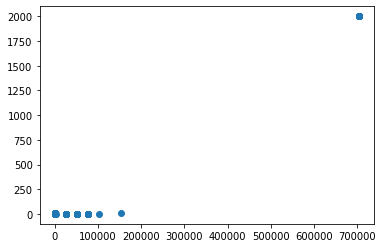

In [100]:

plt.scatter(df["order_amount"],df["total_items"],)

Looking at the distribution of each order amount it is clear that there are a few orders that are clear outliers and represent customers that placed orders for an abnormal number of sneakers (e.g. 2000 sneakers in a single order). These are not representative of the majority of the orders but because their values are so high they push the average order value up. 

RQ1b: Considering the outlier problem, in my view the best way to report the real average order value of this dataset would be to report the median, which is essentially the central number of the order amount values. 

In [146]:
df["order_amount"].median()

284.0

RQ1c: the median order value for this data set is 284.00 dollars

 Q2a queries

```SQL
SELECT ShipperName, count(ShipperID) FROM [Orders]
join [Shippers]
Using(ShipperID)
group by ShipperName
order by count(ShipperID)
```

RQ2a: Speedy Express shipped 54 orders

Q2b queries 

```sql
SELECT LastName, count(EmployeeID) FROM [Employees]
join Orders
using (EmployeeID)
group by LastName
order by count(EmployeeID) DESC
```

RQ2b: The last name of the employee with most orders is Peacock

Q2c queries



``` sql
SELECT ProductName, Quantity , sum(Quantity) as number_items, count(Quantity) as number_orders
FROM Orders, OrderDetails
JOIN Customers ON Orders.CustomerID=Customers.CustomerID
JOIN Products ON OrderDetails.ProductID=Products.ProductID
WHERE Country='Germany'
group by 1
order by sum(Quantity) DESC```

RQ2c: The product ordered the most in Germany was Gorgonzola Telino, with 350 orders and a total of 11450 items. 